## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
flight_data = pd.read_csv('flights.csv')
passenger_data = pd.read_csv('D:\Python(New)\Project\Mid_Term_Project\Colin\clean\passenger_data_2018_2019.csv')
fuel_data = pd.read_csv('D:\Python(New)\Project\Mid_Term_Project\Colin\clean\\fuel_data_2018_2019.csv')

In [3]:
# Check flight data has any null values
flight_data.isnull().sum()

fl_date                  0
mkt_unique_carrier       0
mkt_carrier_fl_num       0
op_unique_carrier        0
tail_num                 0
op_carrier_fl_num        0
origin_airport_id        0
origin                   0
origin_city_name         0
state                    0
dest_airport_id          0
dest                     0
dest_city_name           0
crs_dep_time             0
dep_time                 0
dep_delay                0
taxi_out                 2
wheels_off               2
wheels_on                2
taxi_in                  2
crs_arr_time             0
arr_time                 0
arr_delay                1
crs_elapsed_time         0
actual_elapsed_time    156
air_time                 2
distance                 0
dtype: int64

In [4]:
# Drop null values
flight_data.dropna(inplace = True)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [5]:
# Check data if there are outliers
flight_data.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,1772.448909,1771.396096,12481.095293,12611.864524,1312.735936,1315.429392,11.464983,16.168772,1334.766935,1438.580941,8.101033,1467.871412,1438.369690,6.594719,161.059701,154.850746,131.919633,980.541906
std,1810.190008,1808.121424,1489.795985,1460.621582,493.935760,508.389449,59.160416,8.705936,511.056330,546.451653,7.427126,528.269188,552.506382,60.387160,91.510472,91.134022,88.109417,743.594663
min,1.000000,1.000000,10140.000000,10135.000000,16.000000,15.000000,-18.000000,1.000000,1.000000,3.000000,1.000000,4.000000,1.000000,-50.000000,28.000000,29.000000,16.000000,54.000000
25%,274.000000,274.000000,11278.000000,11292.000000,905.000000,904.000000,-6.000000,11.000000,916.000000,1029.000000,5.000000,1046.500000,1030.500000,-15.000000,96.500000,90.500000,66.000000,422.000000
50%,1012.000000,1012.000000,12402.000000,12478.000000,1328.000000,1332.000000,-2.000000,14.000000,1342.000000,1449.000000,6.000000,1505.000000,1448.000000,-6.000000,140.000000,133.000000,112.000000,792.000000
75%,3296.500000,3296.500000,13577.000000,13881.000000,1710.500000,1724.000000,8.000000,19.000000,1738.500000,1904.000000,9.000000,1911.500000,1904.500000,9.000000,204.500000,192.000000,173.000000,1297.000000
max,6642.000000,6642.000000,16101.000000,16101.000000,2359.000000,2353.000000,1315.000000,89.000000,2358.000000,2359.000000,115.000000,2359.000000,2400.000000,1291.000000,595.000000,576.000000,551.000000,4983.000000


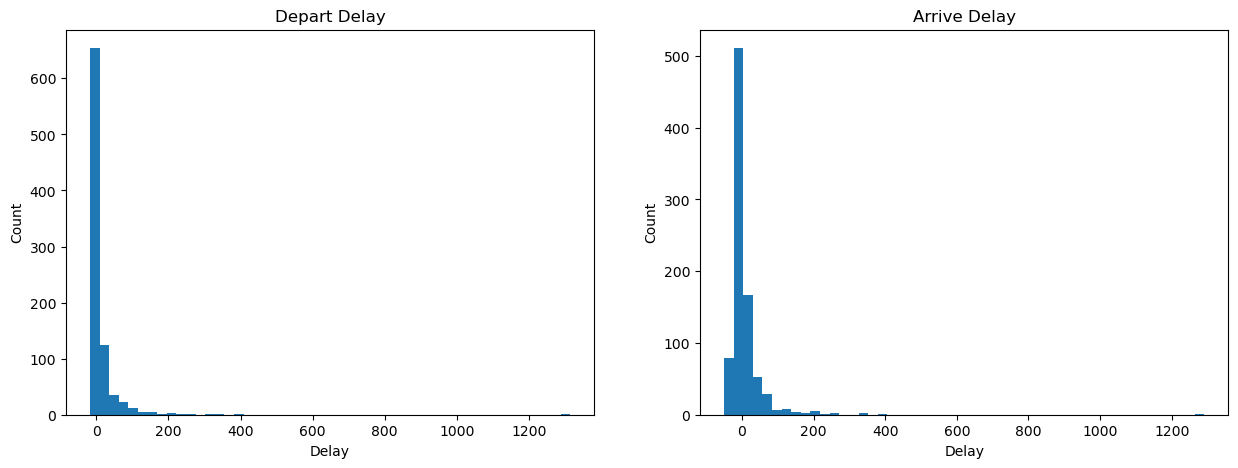

In [6]:
# plot data
flight_data.head()
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# depart delay
axs[0].hist(flight_data['dep_delay'], bins = 50)
axs[0].set_title('Depart Delay')
axs[0].set_xlabel('Delay')
axs[0].set_ylabel('Count')

# arrive delay
axs[1].hist(flight_data['arr_delay'], bins = 50)
axs[1].set_title('Arrive Delay')
axs[1].set_xlabel('Delay')
axs[1].set_ylabel('Count')

plt.show()

As we can see that there is outlier in the flight dataset

In [7]:
# drop outliers
features = ['dep_delay','arr_delay']
for i in features:
    flight_data.drop(flight_data[flight_data[i] > 300].index, inplace = True)

using log transformation, Yeo-Johnson Transformation 

In [8]:
# shapiro wilk test after dropping outliers
normal_dep = stats.shapiro(flight_data['dep_delay'])
print(normal_dep)
normal_arr = stats.shapiro(flight_data['arr_delay'])
print(normal_arr)

ShapiroResult(statistic=0.5404053926467896, pvalue=1.1967088885333938e-42)
ShapiroResult(statistic=0.685651421546936, pvalue=2.8651190545959845e-37)


After dropping values higher than 300, both departure delay and arrival deplay are now normal distributed

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [9]:
flight_data.head()

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,state,...,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance
0,2/1/2018,AA,3366,MQ,N233NN,3366,15016,STL,St. Louis,MO,...,1154.0,1252.0,11.0,1305,1303,-2.0,80,79.0,58.0,258
2,6/1/2018,AA,3315,MQ,N655AE,3315,12992,LIT,Little Rock,AR,...,853.0,942.0,9.0,1025,951,-34.0,93,100.0,49.0,304
5,10/1/2018,AA,2861,EV,N716EV,2861,10781,BTR,Baton Rouge,LA,...,1146.0,1247.0,10.0,1242,1257,15.0,92,68.0,61.0,383
6,1/1/2018,AA,5477,OH,N571NN,5477,11057,CLT,Charlotte,NC,...,2009.0,2110.0,5.0,2118,2115,-3.0,88,137.0,61.0,335
9,1/1/2018,AA,5476,OH,N503AE,5476,13244,MEM,Memphis,TN,...,2057.0,2327.0,10.0,2119,2337,138.0,120,114.0,90.0,762


In [10]:
flight_data['month'] = pd.DatetimeIndex(flight_data['fl_date']).month
flight_data['year'] = pd.DatetimeIndex(flight_data['fl_date']).year
flight_data

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,state,...,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,month,year
0,2/1/2018,AA,3366,MQ,N233NN,3366,15016,STL,St. Louis,MO,...,11.0,1305,1303,-2.0,80,79.0,58.0,258,2,2018
2,6/1/2018,AA,3315,MQ,N655AE,3315,12992,LIT,Little Rock,AR,...,9.0,1025,951,-34.0,93,100.0,49.0,304,6,2018
5,10/1/2018,AA,2861,EV,N716EV,2861,10781,BTR,Baton Rouge,LA,...,10.0,1242,1257,15.0,92,68.0,61.0,383,10,2018
6,1/1/2018,AA,5477,OH,N571NN,5477,11057,CLT,Charlotte,NC,...,5.0,2118,2115,-3.0,88,137.0,61.0,335,1,2018
9,1/1/2018,AA,5476,OH,N503AE,5476,13244,MEM,Memphis,TN,...,10.0,2119,2337,138.0,120,114.0,90.0,762,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,6/1/2019,WN,3399,WN,N203WN,3399,10397,ATL,Atlanta,GA,...,4.0,2110,2109,-1.0,95,78.0,67.0,447,6,2019
1024,2/1/2019,WN,309,WN,N903WN,309,10140,ABQ,Albuquerque,NM,...,4.0,1845,1922,37.0,100,102.0,82.0,580,2,2019
1026,12/1/2019,WN,3672,WN,N8315C,3672,10140,ABQ,Albuquerque,NM,...,4.0,1735,1736,1.0,215,122.0,177.0,1670,12,2019
1027,1/1/2019,WN,1959,WN,N297WN,1959,10140,ABQ,Albuquerque,NM,...,4.0,1500,1440,-20.0,210,116.0,173.0,1670,1,2019


In [11]:
flight_group_mean = flight_data.groupby(['month','year']).mean().reset_index()
flight_group_median = flight_data.groupby(['month','year']).median().reset_index()

In [12]:
date = ['month','year']
for value in date:
    flight_group_mean[value] = flight_group_mean[value].astype('str')
    flight_group_median[value] = flight_group_median[value].astype('str')

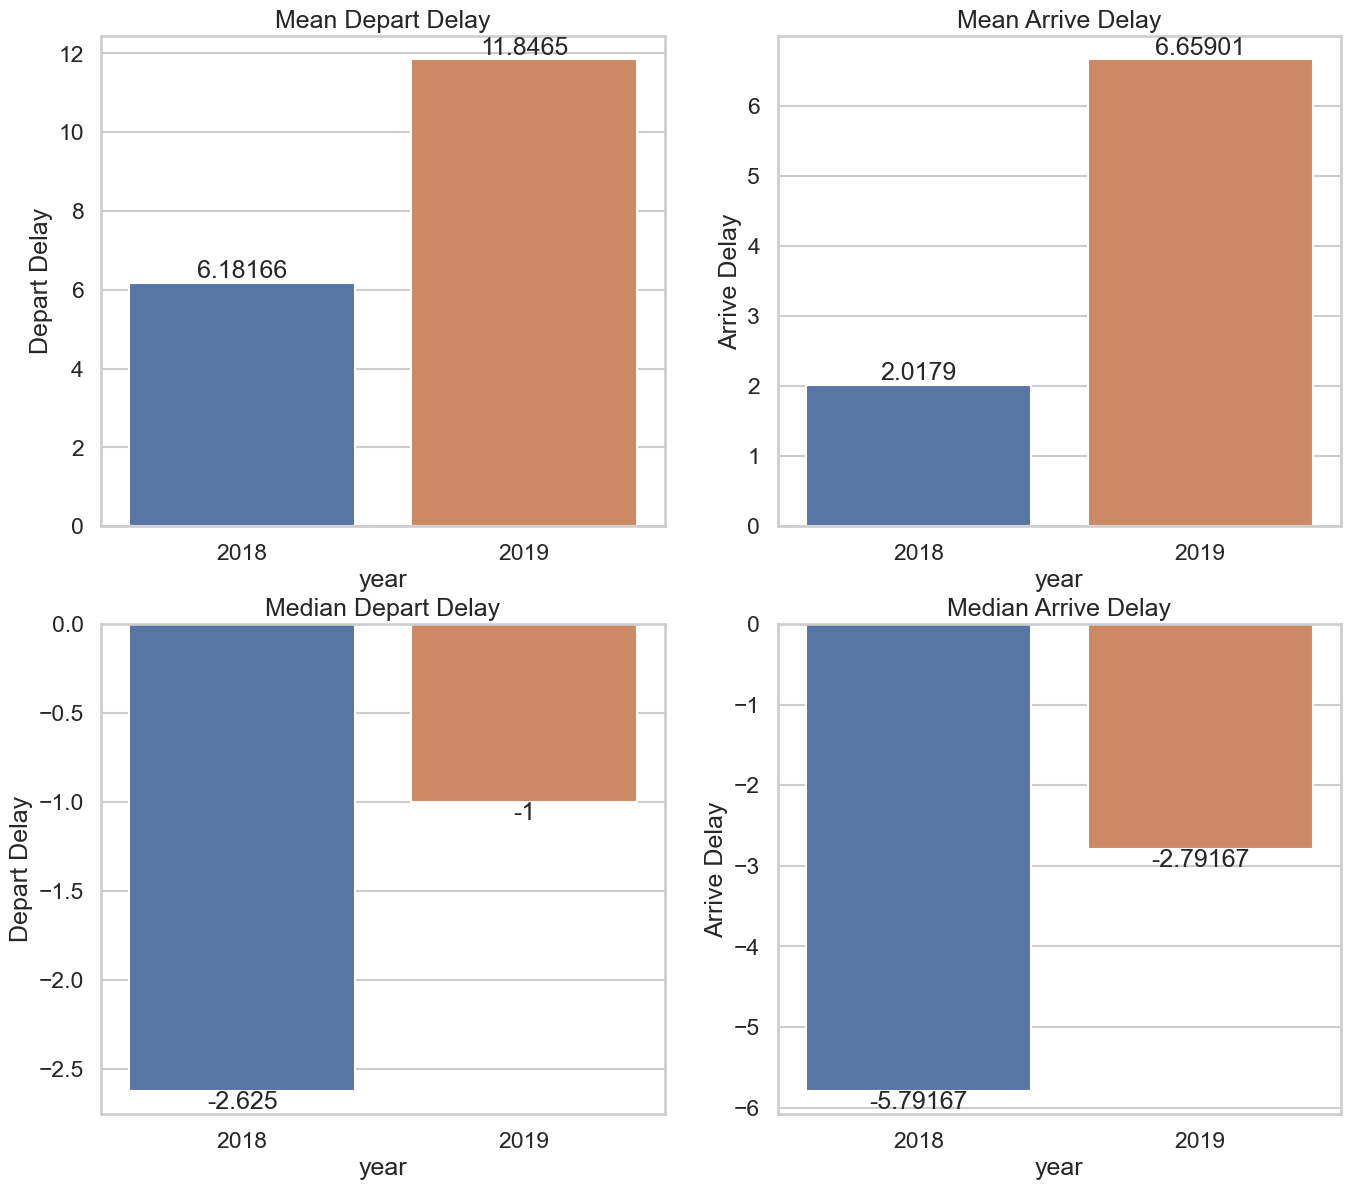

In [13]:
sns.set(style='whitegrid', context='talk')
fig, axs = plt.subplots(2, 2, figsize=(16,14))

# mean depart delay 
mean_depart = sns.barplot(ax = axs[0,0], x = flight_group_mean['year'], y = flight_group_mean['dep_delay'], errorbar = None)
axs[0,0].set_title("Mean Depart Delay")
axs[0,0].set_ylabel("Depart Delay")
for data in mean_depart.containers:
    mean_depart.bar_label(data,)

# mean arrive delay
mean_arrive = sns.barplot(ax = axs[0,1], x = flight_group_mean['year'], y = flight_group_mean['arr_delay'], errorbar = None)
axs[0,1].set_title("Mean Arrive Delay")
axs[0,1].set_ylabel("Arrive Delay")
for data in mean_arrive.containers:
    mean_arrive.bar_label(data,)
    
# median depart delay
median_depart = sns.barplot(ax = axs[1,0], x = flight_group_median['year'], y = flight_group_median['dep_delay'], errorbar = None)
axs[1,0].set_title("Median Depart Delay")
axs[1,0].set_ylabel("Depart Delay")
for data in median_depart.containers:
    median_depart.bar_label(data,)
    
# median arrive delay
median_arrive = sns.barplot(ax = axs[1,1], x = flight_group_median['year'], y = flight_group_median['arr_delay'], errorbar = None)
axs[1,1].set_title("Median Arrive Delay")
axs[1,1].set_ylabel("Arrive Delay")
for data in median_arrive.containers:
    median_arrive.bar_label(data,)

plt.show()

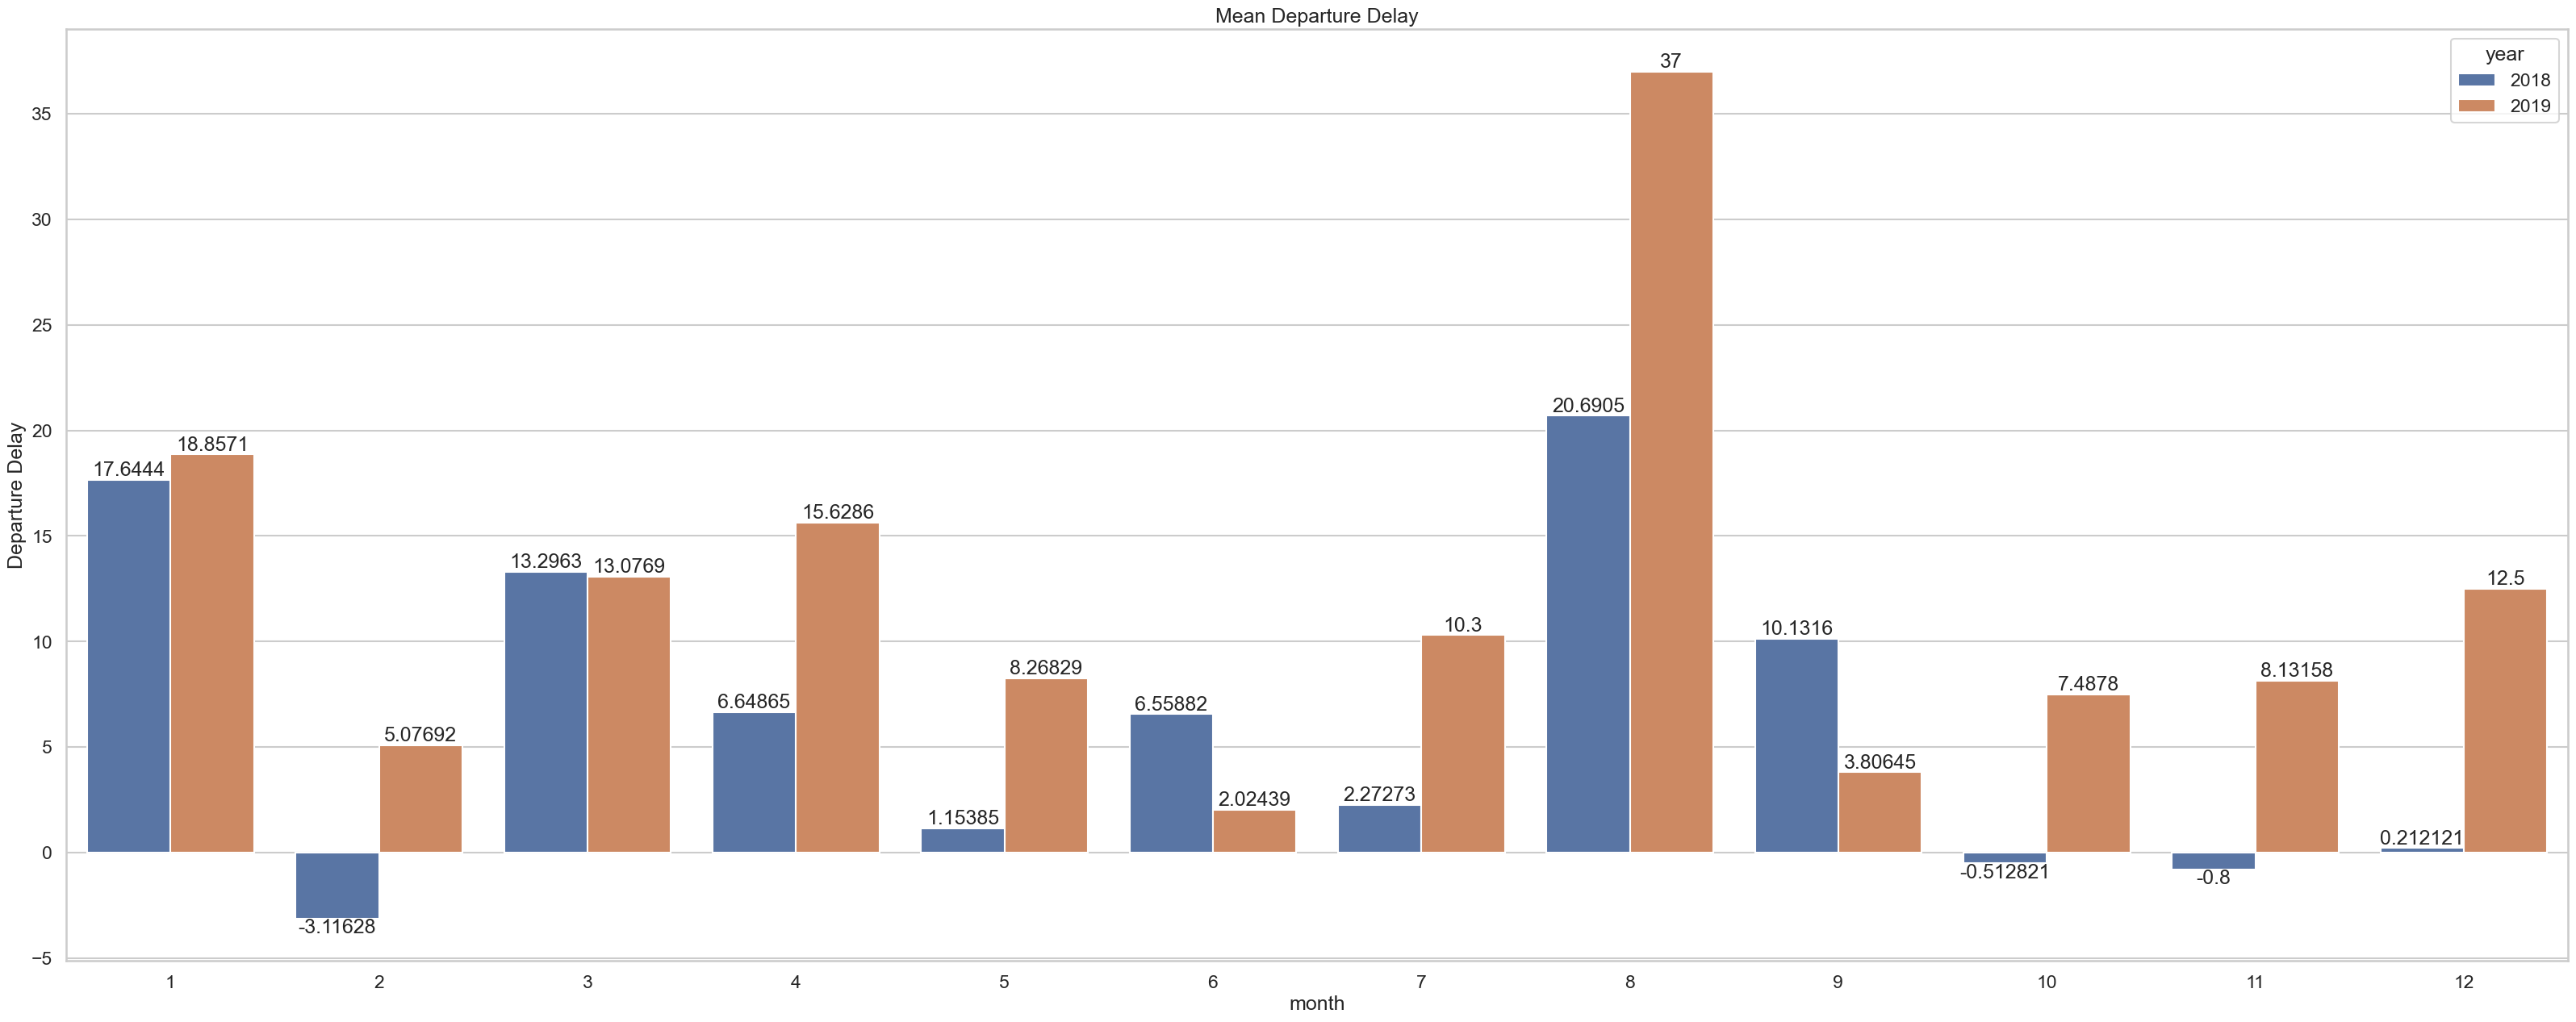

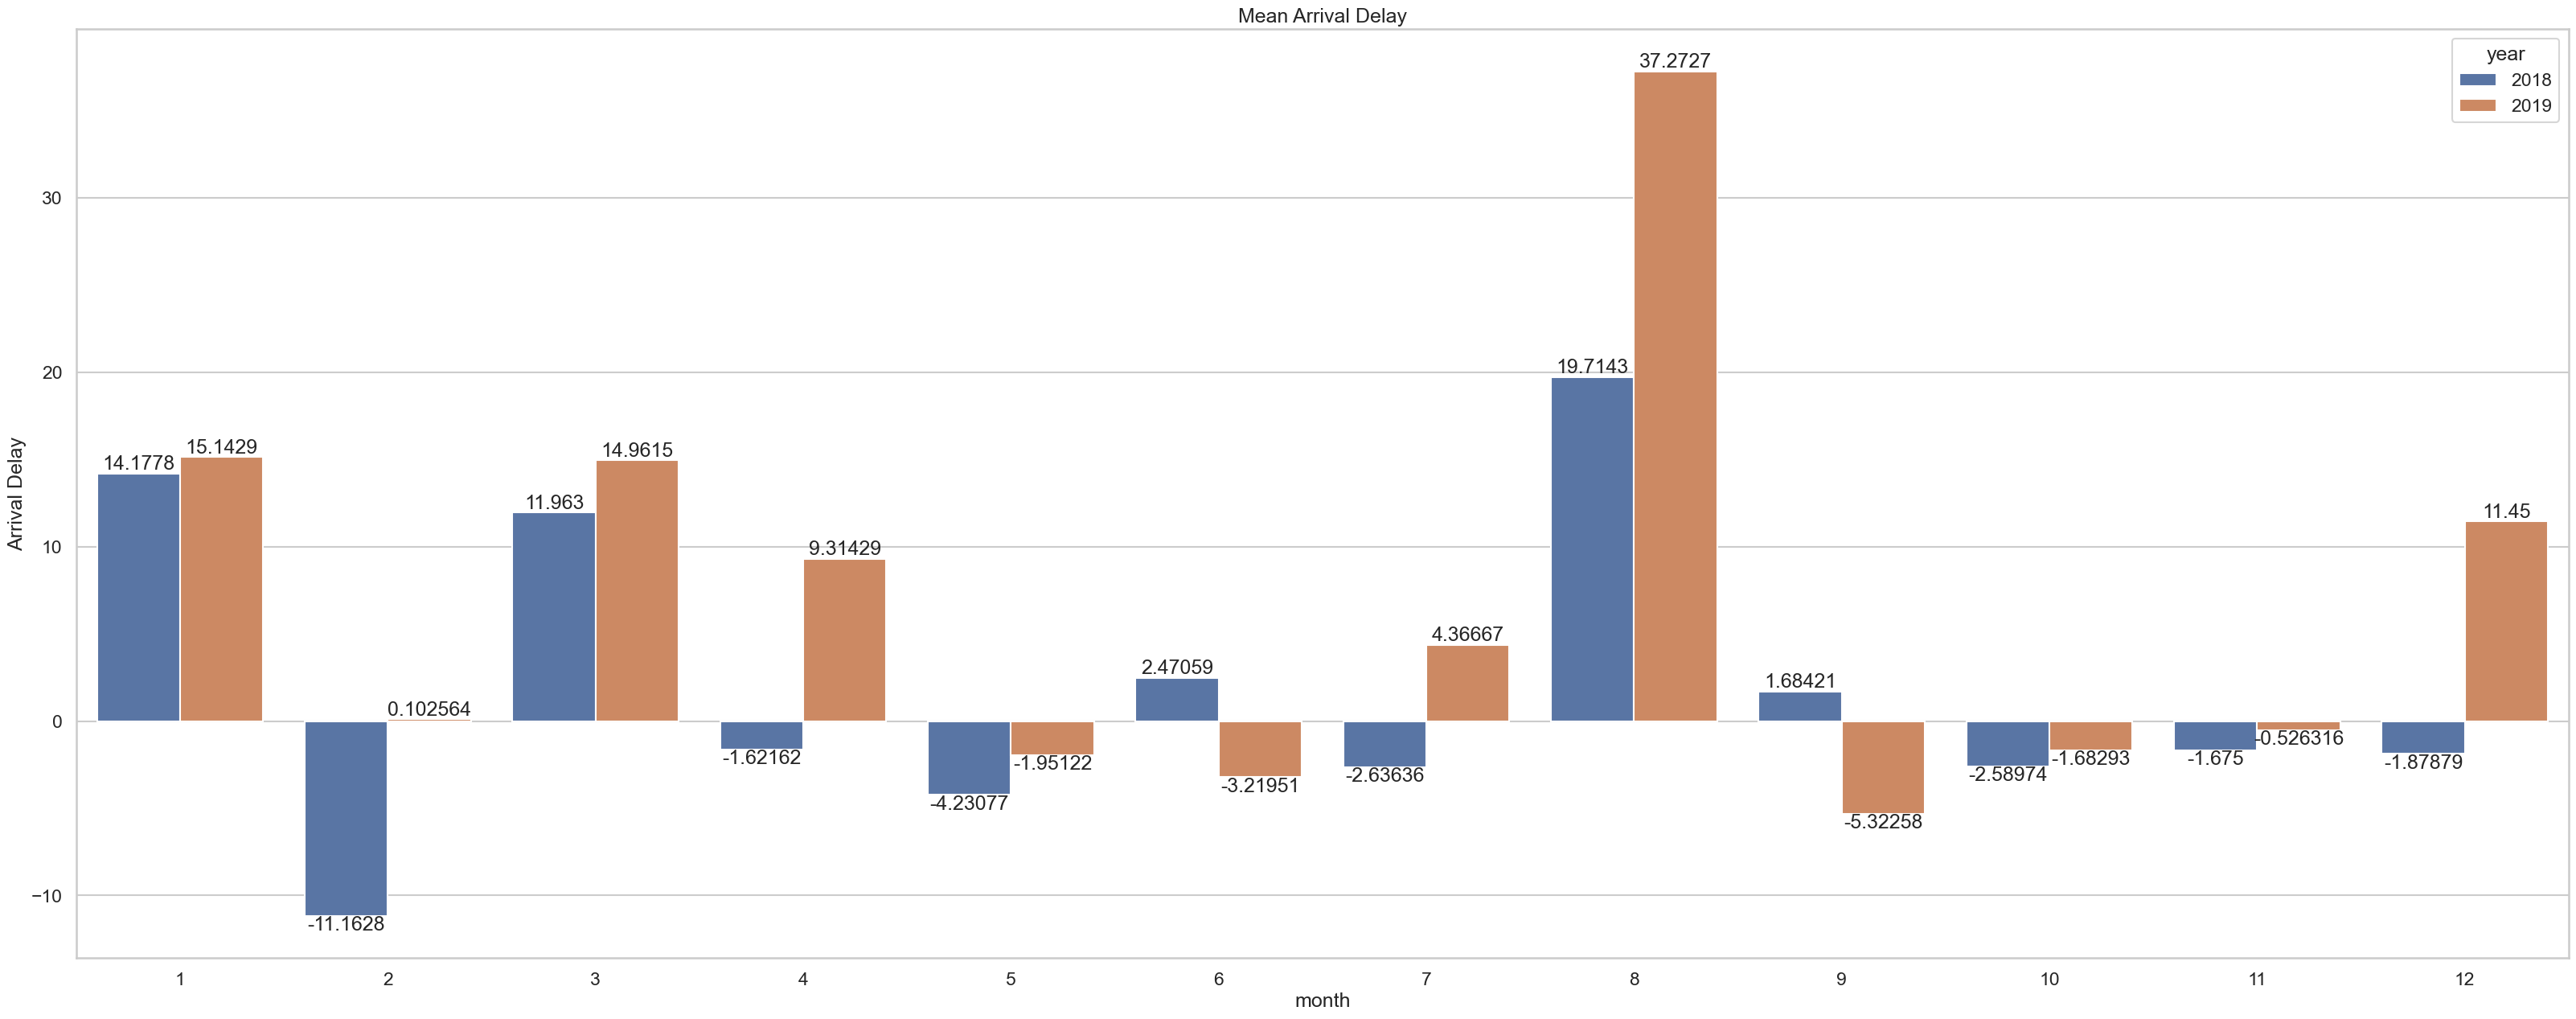

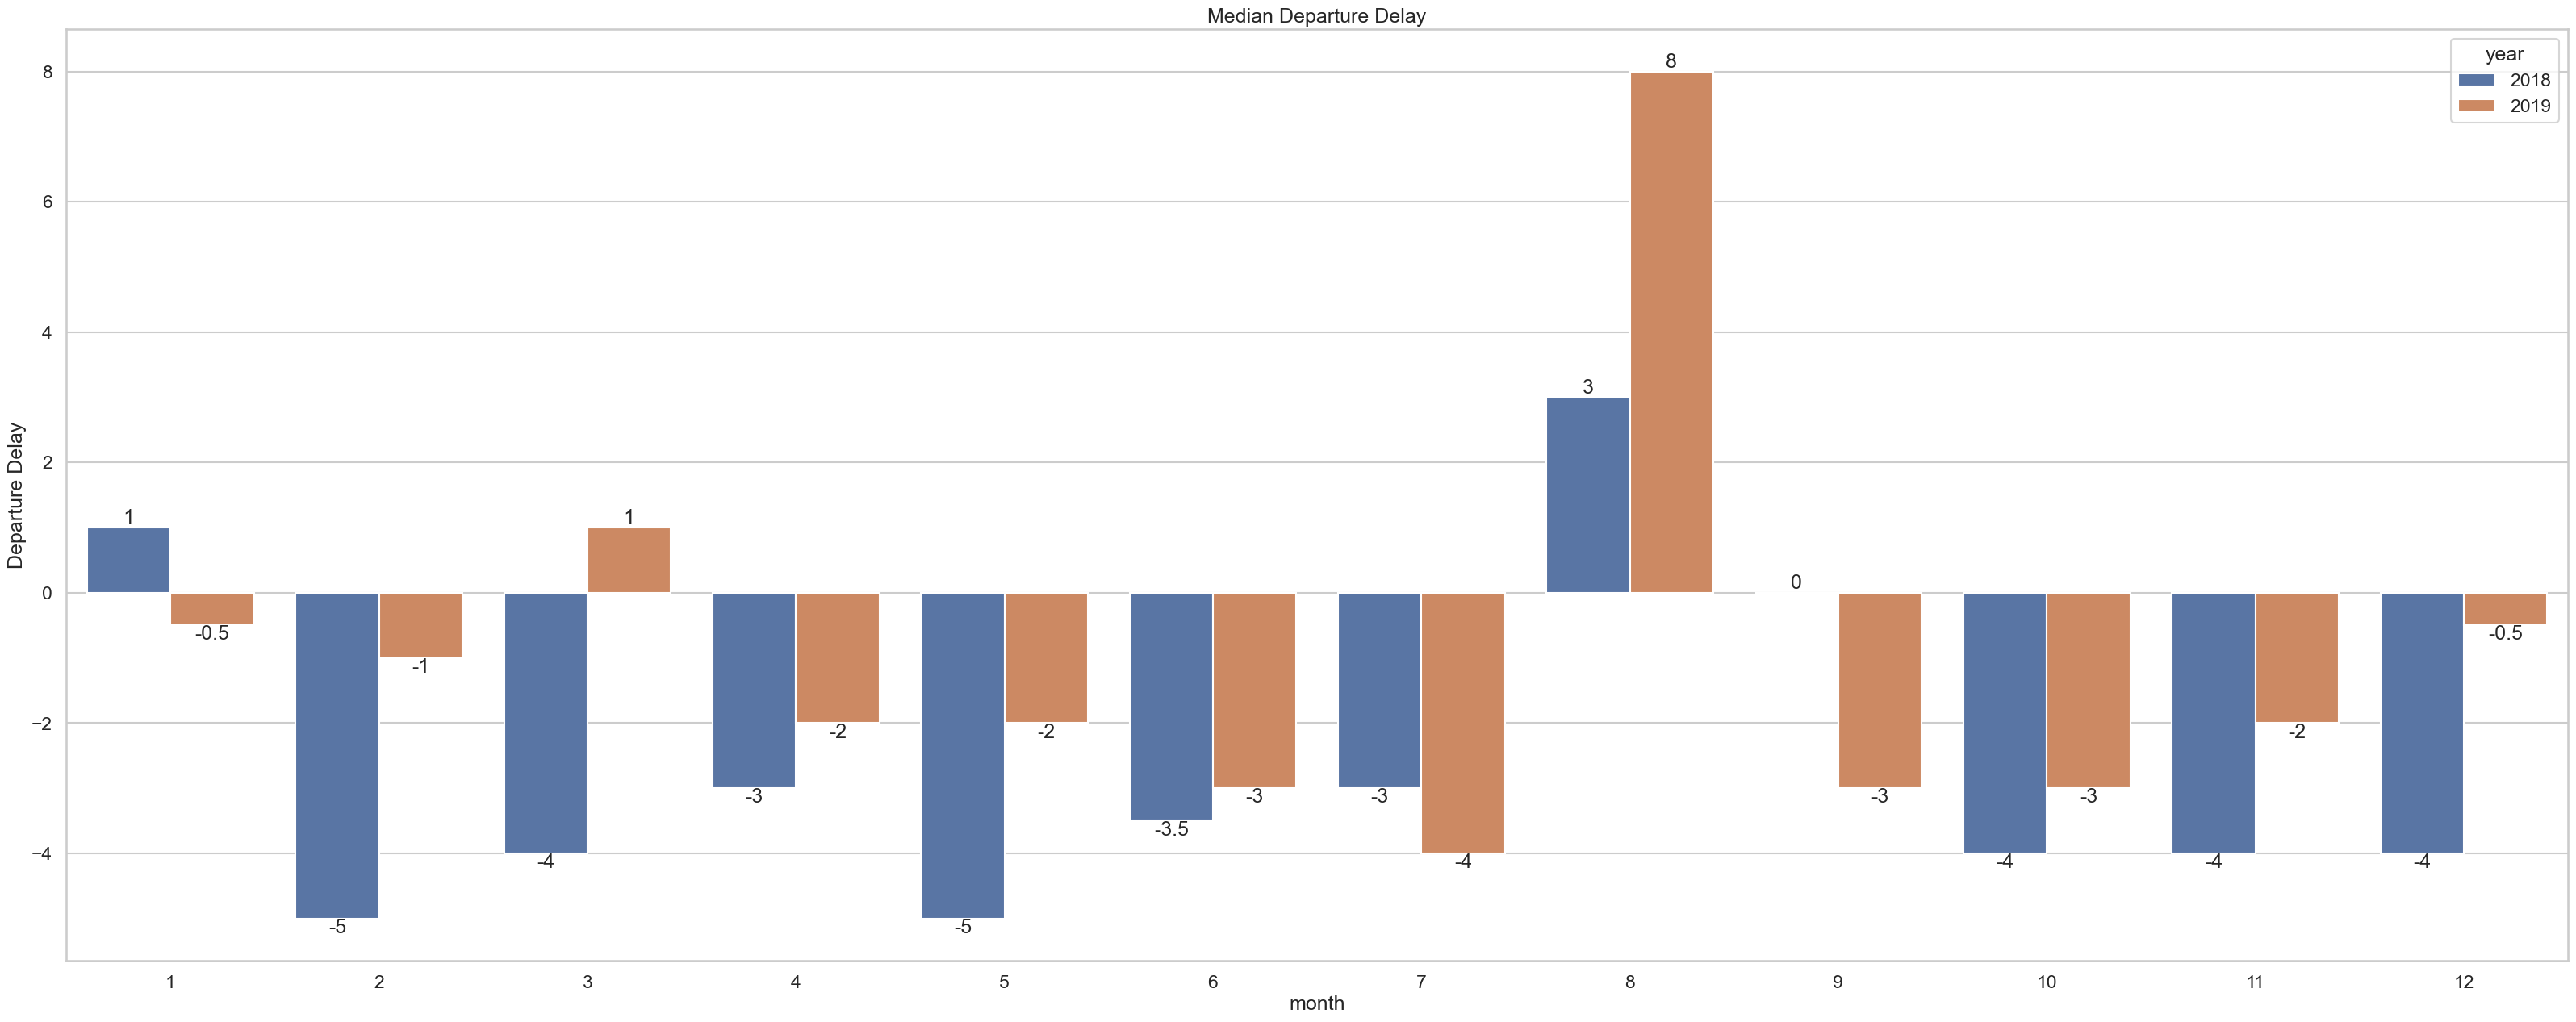

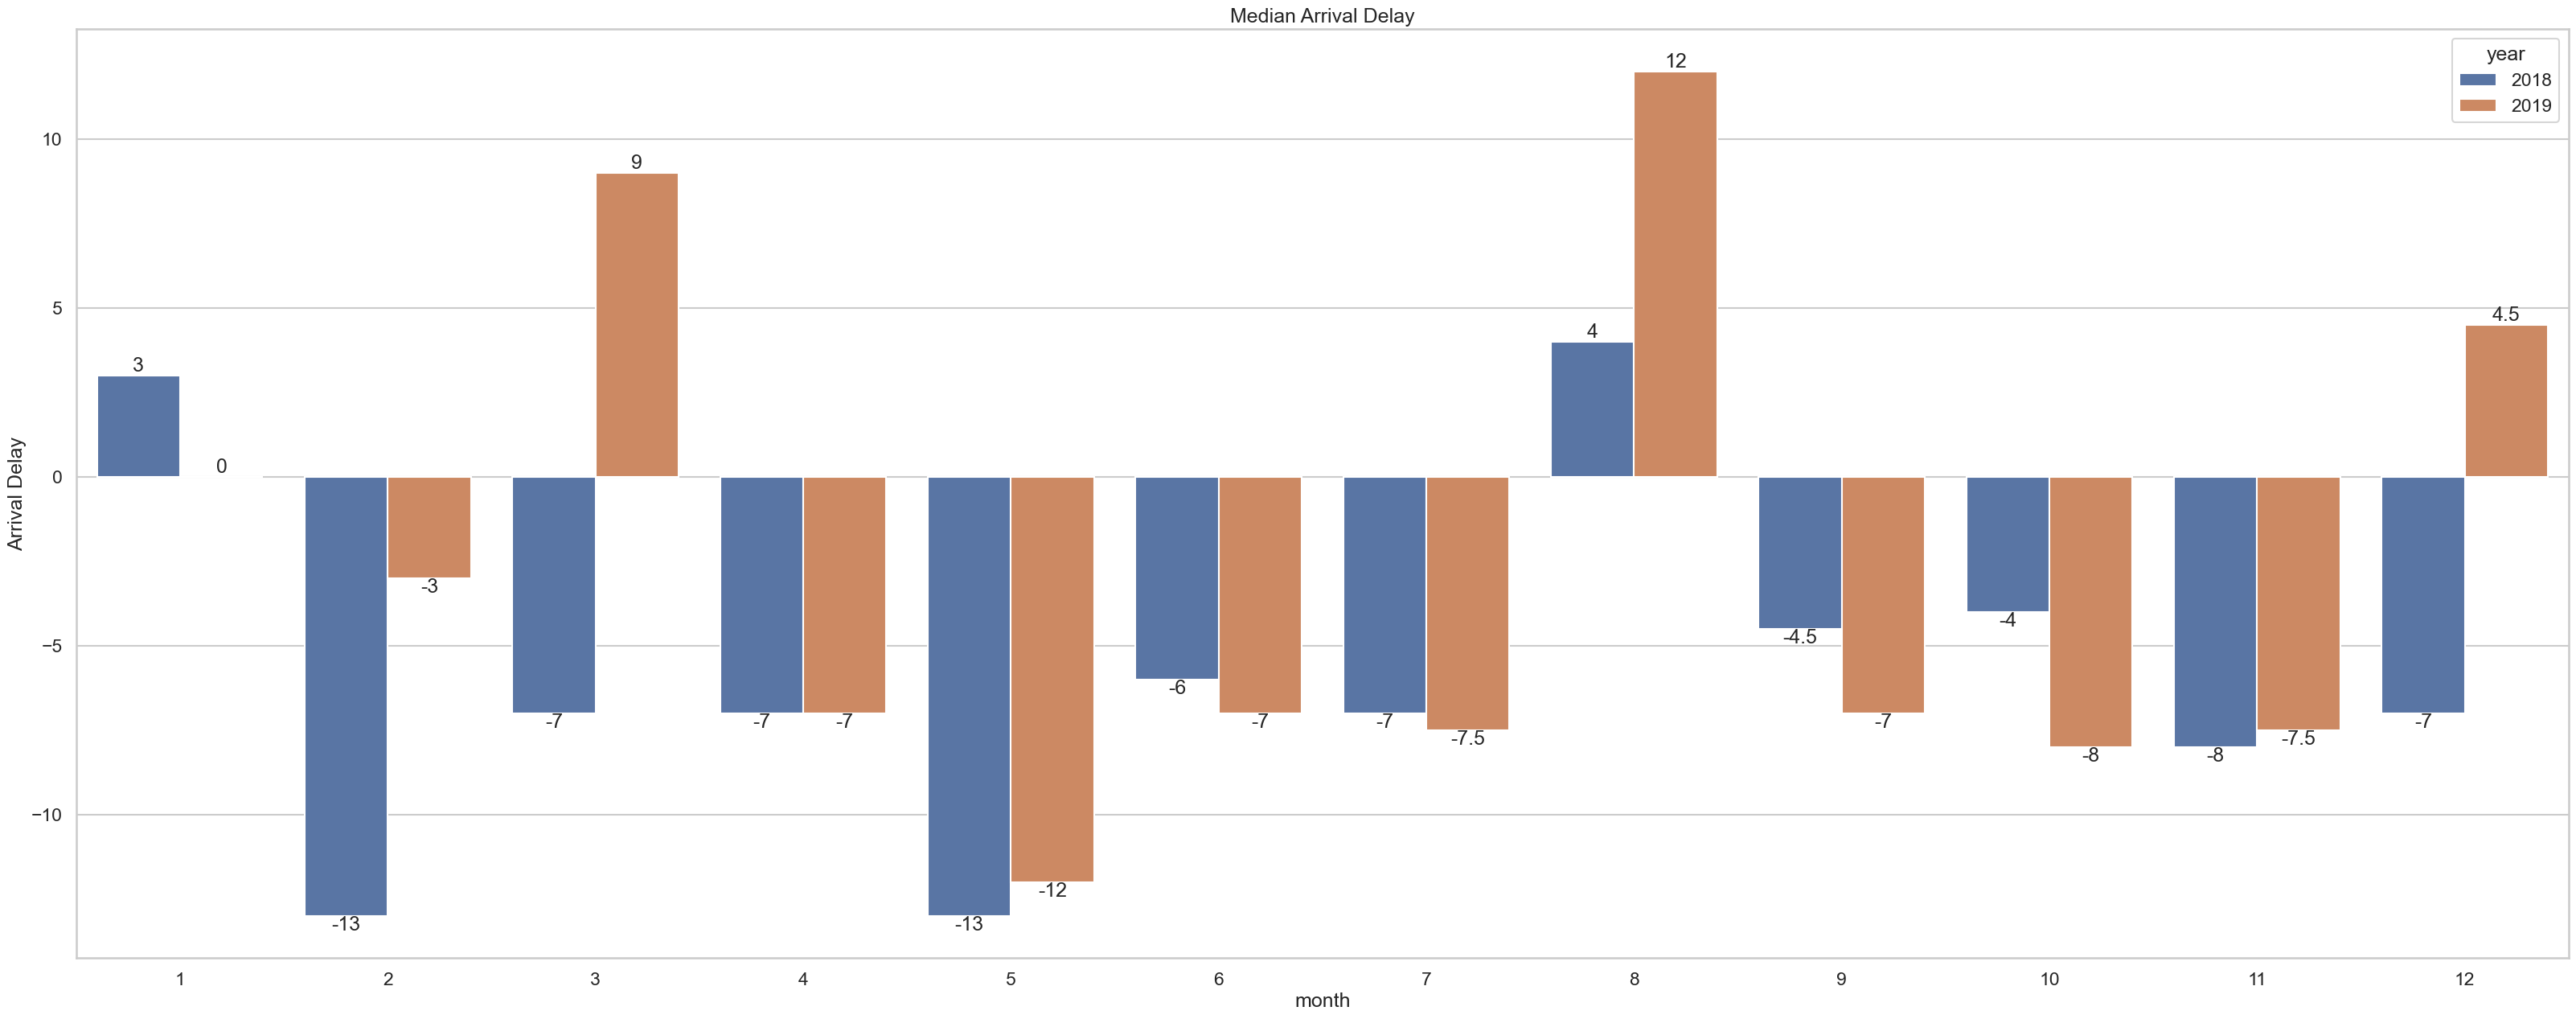

In [14]:
# Mean departure delay over the months between 2018 and 2019
plt.figure(figsize=(40,15))
mean_dep = sns.barplot(data = flight_group_mean, x = 'month', y = 'dep_delay', hue = 'year')
mean_dep.set_title("Mean Departure Delay")
mean_dep.set_ylabel("Departure Delay")
for data in mean_dep.containers:
    mean_dep.bar_label(data,)
    
# Mean arrival delay over the months between 2018 and 2019
plt.figure(figsize=(40,15))
mean_arr = sns.barplot(data = flight_group_mean, x = 'month', y = 'arr_delay', hue = 'year')
mean_arr.set_title("Mean Arrival Delay")
mean_arr.set_ylabel("Arrival Delay")
for data in mean_arr.containers:
    mean_arr.bar_label(data,) 
    
# Median departure delay over the months between 2018 and 2019
plt.figure(figsize=(40,15))
median_dep = sns.barplot(data = flight_group_median, x = 'month', y = 'dep_delay', hue = 'year')
median_dep.set_title("Median Departure Delay")
median_dep.set_ylabel("Departure Delay")
for data in median_dep.containers:
    median_dep.bar_label(data,)
    
# Median arrival delay over the months between 2018 and 2019:
plt.figure(figsize=(40,15))
median_arr = sns.barplot(data = flight_group_median, x = 'month', y = 'arr_delay', hue = 'year')
median_arr.set_title("Median Arrival Delay")
median_arr.set_ylabel("Arrival Delay")
for data in median_arr.containers:
    median_arr.bar_label(data,) 

As being shown in the graph, August is the month that has the highest delay in year 2018 and 2019

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [15]:
# pd.set_option('display.max_columns',flight_data.shape[0]+1)

In [16]:
# category departure time in multiple bins
flight_data['time_bin'] = pd.cut(x = flight_data['crs_dep_time'], bins = [15,500, 1200, 1700, 2100, 2400])

In [17]:
taxi_data = flight_data.groupby(['time_bin']).mean().reset_index()
taxi_data

,time_bin,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,...,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,month,year
0,"(15, 500]",1454.700000,1454.700000,14579.500000,13096.900000,210.000000,219.500000,9.500000,13.900000,241.400000,...,19.200000,566.300000,602.200000,15.900000,160.300000,164.900000,133.600000,1046.700000,7.300000,2018.200000
1,"(500, 1200]",1739.737705,1737.232240,12488.456284,12551.469945,851.715847,855.251366,5.065574,16.019126,882.636612,...,8.153005,1113.827869,1114.338798,0.073770,166.101093,149.450820,136.937158,1011.401639,6.371585,2018.513661
2,"(1200, 1700]",1994.895911,1994.895911,12355.788104,12647.386617,1453.836431,1468.249071,9.654275,16.334572,1496.033457,...,7.929368,1717.710037,1701.483271,5.483271,152.423792,151.769517,123.988848,917.174721,6.144981,2018.509294
3,"(1700, 2100]",1805.339286,1805.339286,12438.142857,12642.107143,1879.220238,1903.797619,14.815476,16.458333,1917.636905,...,7.410714,1954.083333,1868.357143,8.797619,151.529762,168.297619,121.642857,881.875000,6.476190,2018.398810
4,"(2100, 2400]",890.500000,890.500000,12828.166667,12651.703704,2198.740741,2041.611111,11.018519,15.462963,1979.296296,...,8.833333,1296.037037,1128.907407,4.722222,201.740741,158.111111,171.148148,1401.796296,6.629630,2018.425926


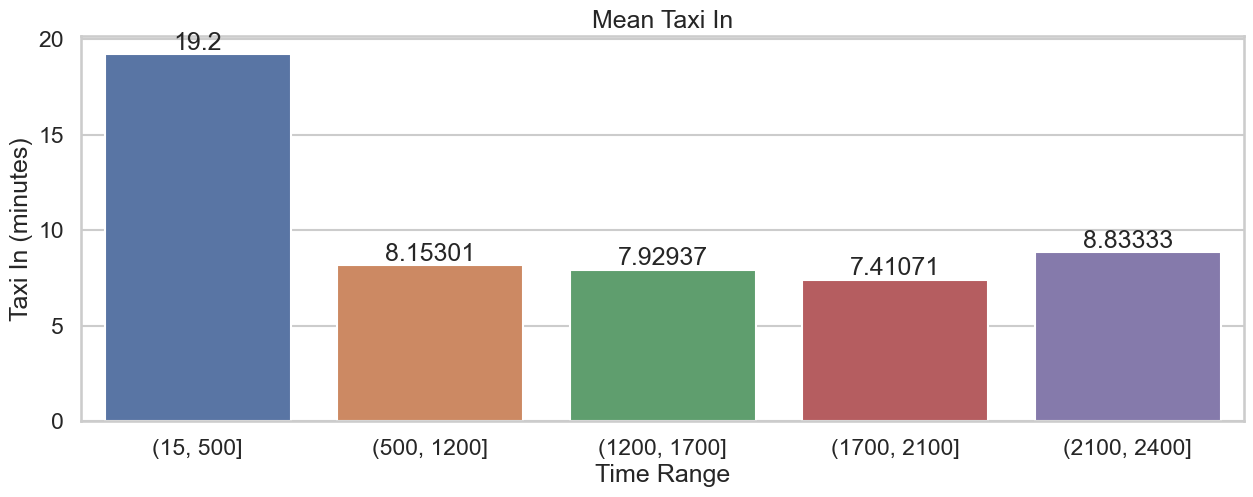

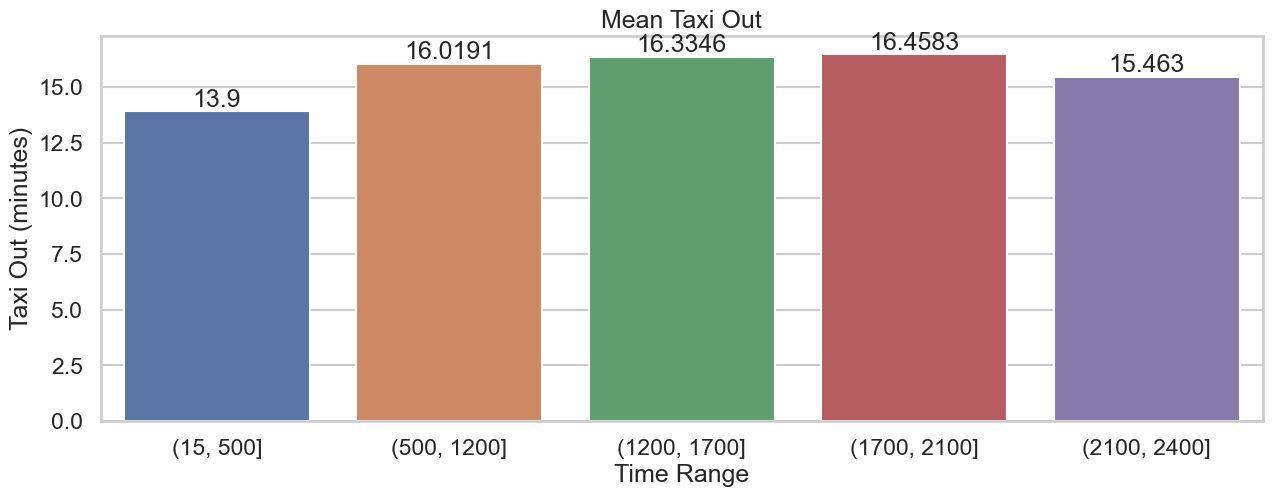

In [18]:
# mean taxi in during the day
plt.figure(figsize=(15,5))
mean_taxi_in = sns.barplot(data = taxi_data, x = 'time_bin', y = 'taxi_in')
mean_taxi_in.set_title("Mean Taxi In")
mean_taxi_in.set_xlabel("Time Range")
mean_taxi_in.set_ylabel("Taxi In (minutes)")
for data in mean_taxi_in.containers:
    mean_taxi_in.bar_label(data,)
    

# mean taxi out during the day
plt.figure(figsize=(15,5))
mean_taxi_out = sns.barplot(data = taxi_data, x = 'time_bin', y = 'taxi_out')
mean_taxi_out.set_title("Mean Taxi Out")
mean_taxi_out.set_xlabel("Time Range")
mean_taxi_out.set_ylabel("Taxi Out (minutes)")
for data in mean_taxi_out.containers:
    mean_taxi_out.bar_label(data,)
    


In [19]:
# change data type into string
#flight_data['op_carrier_fl_num'] = flight_data['op_carrier_fl_num'].astype('str')

In [20]:
number_of_flight = flight_data.groupby(['time_bin']).count().reset_index()
number_of_flight

,time_bin,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,month,year
0,"(15, 500]",10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
1,"(500, 1200]",366,366,366,366,366,366,366,366,366,...,366,366,366,366,366,366,366,366,366,366
2,"(1200, 1700]",269,269,269,269,269,269,269,269,269,...,269,269,269,269,269,269,269,269,269,269
3,"(1700, 2100]",168,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
4,"(2100, 2400]",54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54


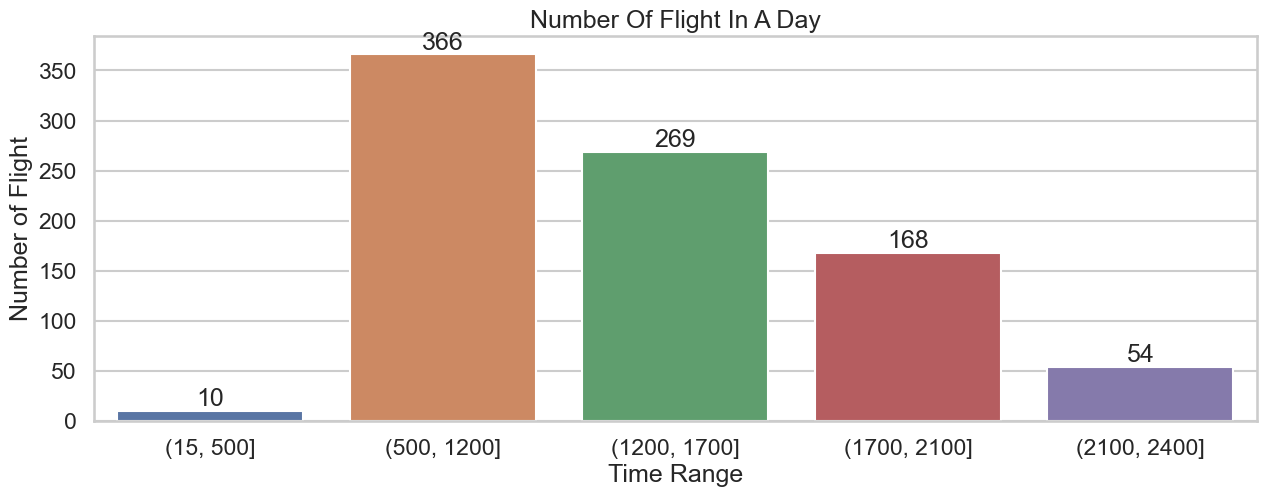

In [21]:
# mean taxi in during the day
plt.figure(figsize=(15,5))
number_flight = sns.barplot(data = number_of_flight, x = 'time_bin', y = 'op_carrier_fl_num', errorbar = None)
number_flight.set_title("Number Of Flight In A Day")
number_flight.set_xlabel("Time Range")
number_flight.set_ylabel("Number of Flight")
for data in number_flight.containers:
    number_flight.bar_label(data,)

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [22]:
print('percent of flights with departure delays \n',len(flight_data[flight_data['dep_delay'] > 0][['dep_delay','arr_delay']])/100,'%\n')
print('percent of flights with departure delays that arrived early\n',len(flight_data[(flight_data['dep_delay'] > 0) & (flight_data['arr_delay'] < 1)][['dep_delay','arr_delay']])/100,'%\n')
print('percent of flights with departure delays that arrived late\n',len(flight_data[(flight_data['dep_delay'] > 0) & (flight_data['arr_delay'] > 0)][['dep_delay','arr_delay']])/100,'%\n')
print('percent of flights with departure delays that made up time but did not arrive early\n',len(flight_data[(flight_data['dep_delay'] > 0) & (flight_data['arr_delay'] < flight_data['dep_delay'])][['dep_delay','arr_delay']])/100,'%\n')

percent of flights with departure delays 
 3.13 %

percent of flights with departure delays that arrived early
 0.78 %

percent of flights with departure delays that arrived late
 2.35 %

percent of flights with departure delays that made up time but did not arrive early
 2.13 %



#### **Task 6**: How many states cover 50% of US air traffic? 

In [23]:
air_trafic = flight_data.groupby(['state']).count().sort_values(by = 'op_carrier_fl_num',ascending = False).reset_index()

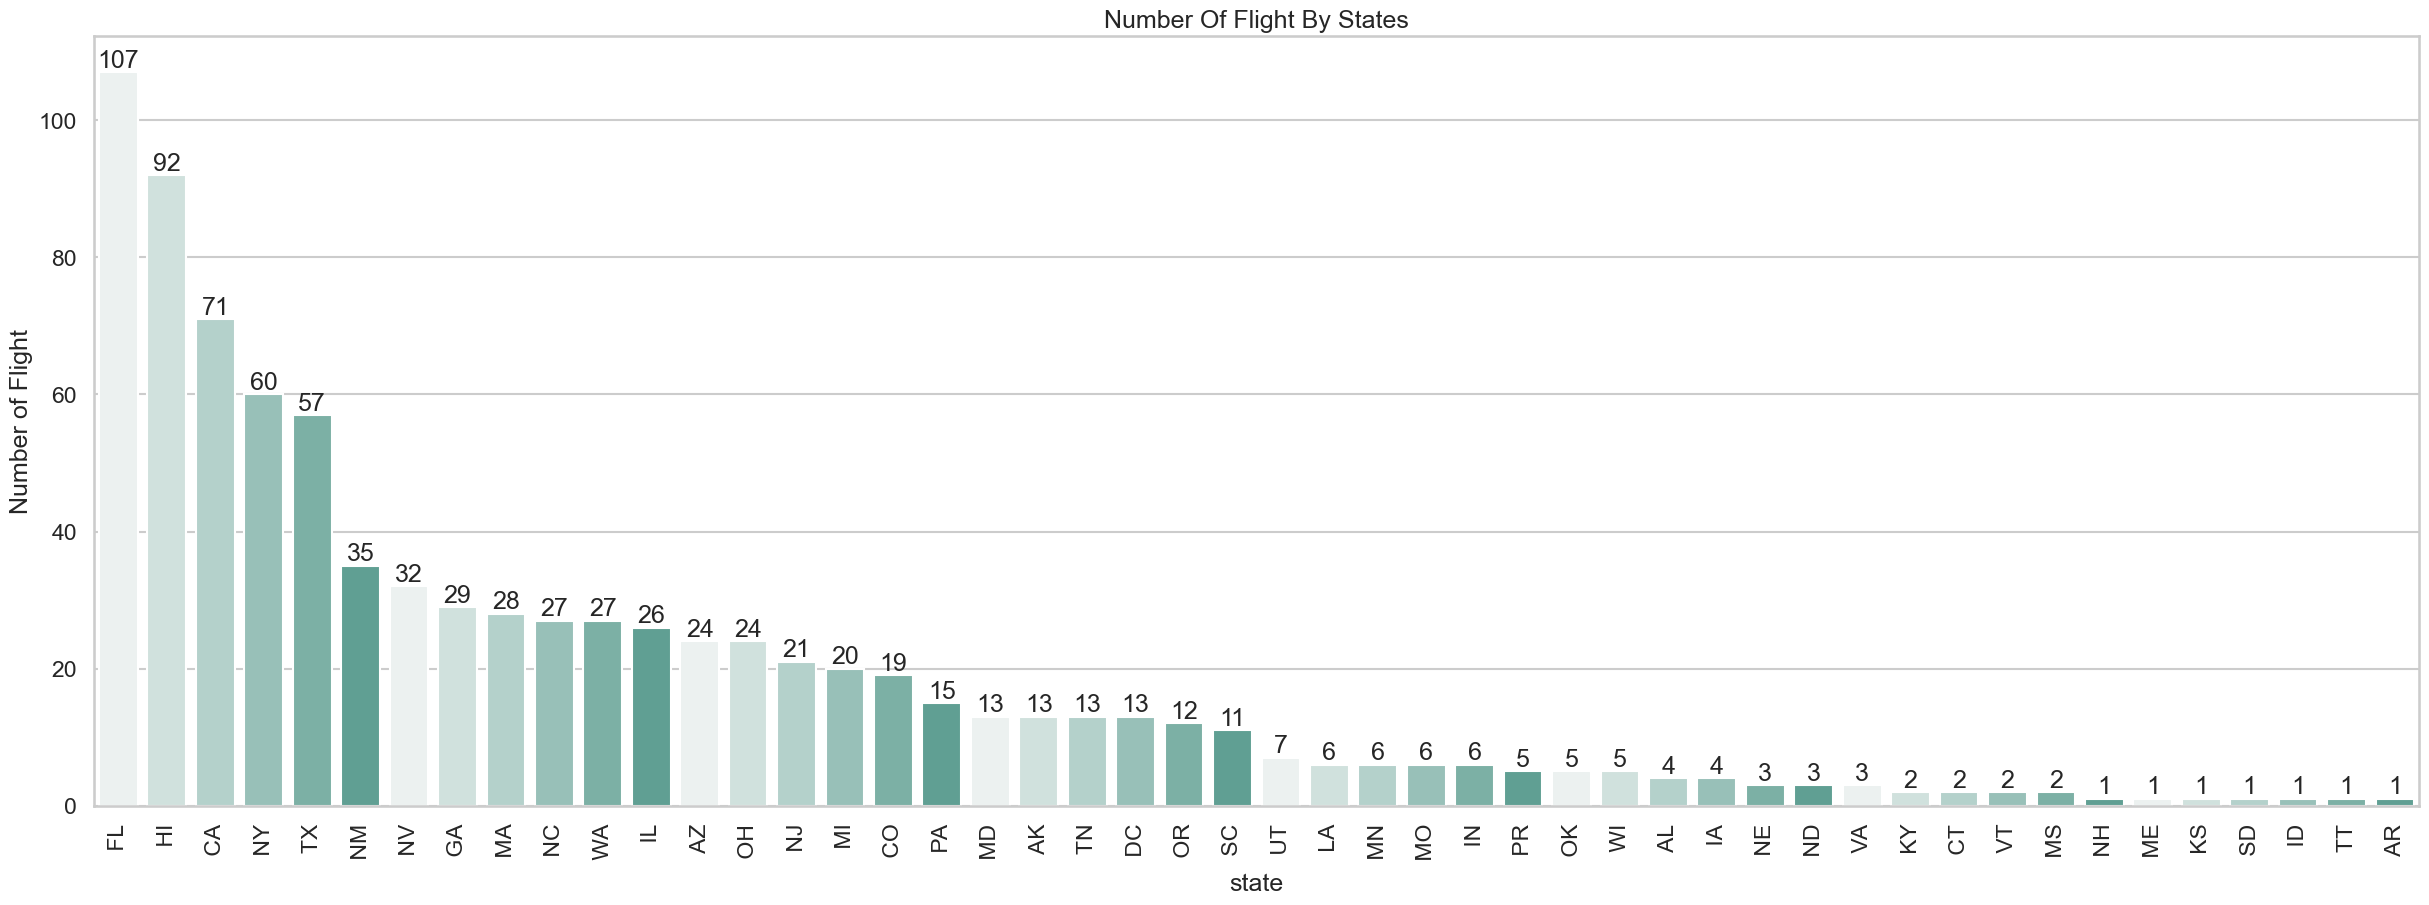

In [24]:
plt.figure(figsize=(30,10))
cmap= sns.color_palette("light:#5A9", as_cmap= False)
state_trafic = sns.barplot(data = air_trafic, x = 'state', y = 'op_carrier_fl_num', palette = cmap)
state_trafic.set_title("Number Of Flight By States")
state_trafic.set_ylabel("Number of Flight")
plt.xticks(rotation=90)
for data in state_trafic.containers:
    state_trafic.bar_label(data,)

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [25]:
flight_data['time_diff'] = flight_data['actual_elapsed_time'] - flight_data['crs_elapsed_time']

In [28]:
print('percentage of flights with dep_delays:',(len(flight_data[(flight_data['dep_delay'] > 0)])/1000),'%')
print('percentage of dep_delay flights that flew faster than predicted:',(len(flight_data[(flight_data['dep_delay'] > 0)&(flight_data['time_diff'] < 0)])/100),'%')
print('percentage of dep_delay flights that flew slower than predicted:',(len(flight_data[(flight_data['dep_delay'] > 0)&(flight_data['time_diff'] > 0)])/100),'%')
print('percentage of dep_delay flights that flex the exact time predicted:',(len(flight_data[(flight_data['dep_delay'] > 0)&(flight_data['time_diff'] == 0)])/100),'%')

percentage of flights with dep_delays: 0.313 %
percentage of dep_delay flights that flew faster than predicted: 1.69 %
percentage of dep_delay flights that flew slower than predicted: 1.42 %
percentage of dep_delay flights that flex the exact time predicted: 0.02 %


#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

[source about haul flights](https://www.themcggroup.com/blog/the-differences-between-longhaul-and-shorthaul-piloting/bp67/#:~:text=Short%2Dhaul%20is%20a%20flight,that%20extend%20beyond%206%20hours.) 

* Short-haul: 30 mins to 3 hours
* Medium-haul: 3 hours to 6 hours
* Long-haul: 6 hours

In [43]:
flight_data['flight_haul'] = pd.cut(flight_data['arr_time'], bins = [-float('inf'), 180, 360, float('inf')], labels = ['Short-Haul','Medium-Haul','Long-Haul'])
flight_data

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,state,...,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,month,year,time_bin,time_diff,flight_haul
0,2/1/2018,AA,3366,MQ,N233NN,3366,15016,STL,St. Louis,MO,...,-2.0,80,79.0,58.0,258,2,2018,"(500, 1200]",-1.0,Long-Haul
2,6/1/2018,AA,3315,MQ,N655AE,3315,12992,LIT,Little Rock,AR,...,-34.0,93,100.0,49.0,304,6,2018,"(500, 1200]",7.0,Long-Haul
5,10/1/2018,AA,2861,EV,N716EV,2861,10781,BTR,Baton Rouge,LA,...,15.0,92,68.0,61.0,383,10,2018,"(500, 1200]",-24.0,Long-Haul
6,1/1/2018,AA,5477,OH,N571NN,5477,11057,CLT,Charlotte,NC,...,-3.0,88,137.0,61.0,335,1,2018,"(1700, 2100]",49.0,Long-Haul
9,1/1/2018,AA,5476,OH,N503AE,5476,13244,MEM,Memphis,TN,...,138.0,120,114.0,90.0,762,1,2018,"(1700, 2100]",-6.0,Long-Haul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,6/1/2019,WN,3399,WN,N203WN,3399,10397,ATL,Atlanta,GA,...,-1.0,95,78.0,67.0,447,6,2019,"(1700, 2100]",-17.0,Long-Haul
1024,2/1/2019,WN,309,WN,N903WN,309,10140,ABQ,Albuquerque,NM,...,37.0,100,102.0,82.0,580,2,2019,"(1200, 1700]",2.0,Long-Haul
1026,12/1/2019,WN,3672,WN,N8315C,3672,10140,ABQ,Albuquerque,NM,...,1.0,215,122.0,177.0,1670,12,2019,"(500, 1200]",-93.0,Long-Haul
1027,1/1/2019,WN,1959,WN,N297WN,1959,10140,ABQ,Albuquerque,NM,...,-20.0,210,116.0,173.0,1670,1,2019,"(500, 1200]",-94.0,Long-Haul


#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?